### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression,SGDRegressor

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import KFold
from sklearn import preprocessing

#### Load the first dataset and check the first two observations

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df=pd.read_csv('/content/drive/My Drive/SLR/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [4]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

In [5]:
df['volatile acidity'].skew()

1.5769795029952025

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

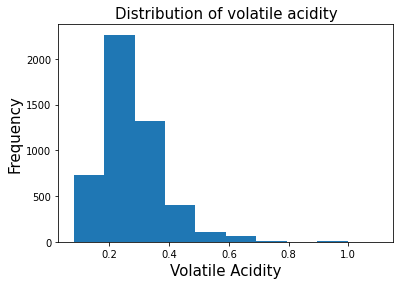

In [6]:
# plot histogram
plt.hist(df['volatile acidity'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of volatile acidity', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Volatile Acidity', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

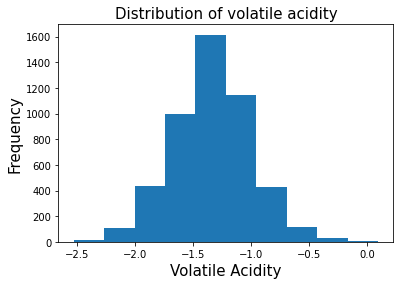

In [7]:
# applying log transformation
df['volatile acidity'] = np.log(df['volatile acidity'])

# plot histogram of log transformed variable
plt.hist(df['volatile acidity'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of volatile acidity', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Volatile Acidity', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [8]:
df['volatile acidity'].skew()

0.13938315393329148

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df['residual sugar'].skew()

1.0770937564240868

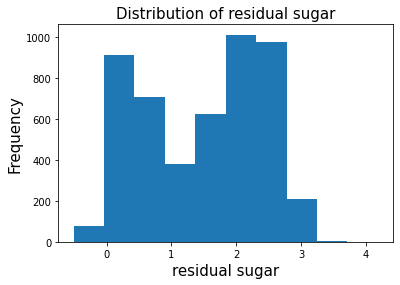

In [14]:
# applying log transformation
df['residual sugar'] = np.log(df['residual sugar'])

# plot histogram of log transformed variable
plt.hist(df['residual sugar'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of residual sugar', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('residual sugar', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [15]:
df['residual sugar'].skew()

-0.1611568975182972

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.var()

fixed acidity             0.712114
volatile acidity          0.010160
citric acid               0.014646
residual sugar            0.849615
chlorides                 0.000477
free sulfur dioxide     289.242720
total sulfur dioxide   1806.085491
density                   0.000009
pH                        0.022801
sulphates                 0.013025
alcohol                   1.514427
quality                   0.784356
dtype: float64

From the above result we can see the variables `chlorides` and `density` have a near zero variance, which implies they adds almost no new information to the data. Hence they can be eliminated during feature selection. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df['alcohol'].skew()

0.310134622964236

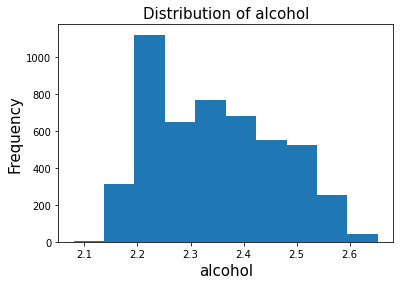

In [17]:
# applying log transformation
df['alcohol'] = np.log(df['alcohol'])

# plot histogram of log transformed variable
plt.hist(df['alcohol'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of alcohol', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('alcohol', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [ ]:
df['alcohol'].skew()

0.310134622964236

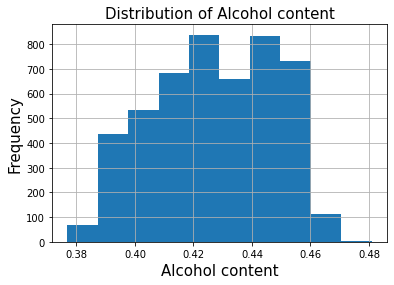

In [19]:
# applying reciprocal transformation
df.alcohol = np.reciprocal(df.alcohol)

# plot histogram for transformed values of alcohol column
df.alcohol.hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of Alcohol content', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('Alcohol content', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [20]:
df['alcohol'].skew()

-0.16494740051177137

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df['pH'].skew()

0.4577825459180807

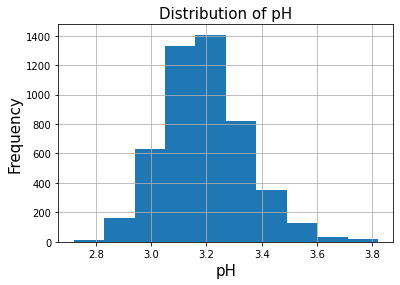

In [22]:
# plot histogram
df.pH.hist()

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of pH', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('pH', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

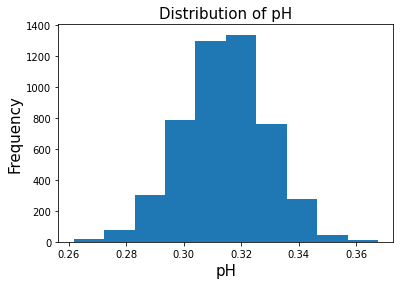

In [23]:
# applying log transformation
df['pH'] = np.reciprocal(df['pH'])

# plot histogram of log transformed variable
plt.hist(df['pH'])

# add plot title
# set text size using 'fontsize'
plt.title('Distribution of pH', fontsize = 15)

# label x-axis
# set text size to 15 using 'fontsize'
plt.xlabel('pH', fontsize = 15)

# label y-axis 
# set text size using 'fontsize'
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [24]:
df['pH'].skew()

-0.1447760138578025

In [25]:
# select all features of the data for full model
X = df.iloc[:,:10]
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
model = sm.OLS(y,X).fit()

# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     154.6
Date:                Thu, 17 Jun 2021   Prob (F-statistic):          1.23e-282
Time:                        05:13:21   Log-Likelihood:                -5681.7
No. Observations:                4898   AIC:                         1.139e+04
Df Residuals:                    4887   BIC:                         1.146e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  200.0953 

In [26]:
# create the Scaler object
scaler = preprocessing.StandardScaler()

# fit your data on the scaler object
# we pass the column by converting into dataframe since fit_transform() requires a dataframe input
df.pH = scaler.fit_transform(pd.DataFrame(df.pH))

As we can see the scaling of 'pH' feature does no have any impact on prediction performance since the R<sup>2</sup> value for the both the models is equal. From this we can infer that scaling does not necessarily improve the model even if the range of features are different.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# filter the numerical features in the dataset
# select_dtypes: selects the variable having specified datatype
df_numeric = df.select_dtypes(include=[np.number])

# drop the target variable
# 'axis = 1' drops the specified column
df_numeric = df_numeric.drop("quality", axis = 1)

# create a column of variable names
vif["Features"] = df_numeric.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# print the VIF
print(vif)

                Features        VIF
0          fixed acidity  91.874793
1       volatile acidity   9.670552
2            citric acid   9.971191
3         residual sugar   4.942664
4              chlorides   6.472547
5    free sulfur dioxide   9.255748
6   total sulfur dioxide  25.321657
7                density 752.316874
8                     pH   1.341170
9              sulphates  20.565211
10               alcohol 725.635373


In [31]:
np.corrcoef(df['alcohol'],df['residual sugar'])

array([[1.        , 0.41565143],
       [0.41565143, 1.        ]])

In [30]:
np.corrcoef(df['density'],df['alcohol'])

array([[1.        , 0.78816019],
       [0.78816019, 1.        ]])

From the above result we can see that multicollinearity is present and to determine the variables that contribute to multicollinearity we use VIF threshold value = 10. Hence to rectify the problem of multicollinearity we need to eliminate the variables `fixed acidity`,`volatile acidity`,`total sulfur dioxide`,`density`, `sulphates` and `alcohol`.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# select all features of the data for full model
X = df.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
model = sm.OLS(y,X).fit()

# obtain the residuals using resid
residuals = model.resid

# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     156.1
Date:                Wed, 16 Jun 2021   Prob (F-statistic):          4.29e-285
Time:                        11:21:25   Log-Likelihood:                -5676.0
No. Observations:                4898   AIC:                         1.137e+04
Df Residuals:                    4887   BIC:                         1.145e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  195.0943 

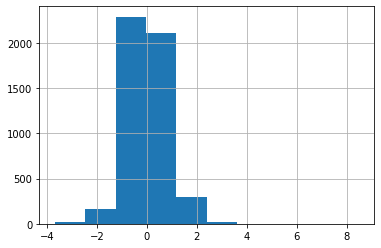

In [ ]:
residuals.hist()

In [ ]:
residuals.skew() #residuals do follow a near normal distribution

0.40627065949871005

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# perform square root transformation
df['citric acid'] = np.sqrt(df['citric acid'])

In [ ]:
# select all features of the data for full model
X = df.iloc[:,:10]

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df['quality']

# building a model with an intercept
# fit() is used to fit the OLS model
model = sm.OLS(y,X).fit()

# obtain the residuals using resid
residuals = model.resid

# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     156.1
Date:                Wed, 16 Jun 2021   Prob (F-statistic):          4.29e-285
Time:                        11:17:21   Log-Likelihood:                -5676.0
No. Observations:                4898   AIC:                         1.137e+04
Df Residuals:                    4887   BIC:                         1.145e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  195.0943 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

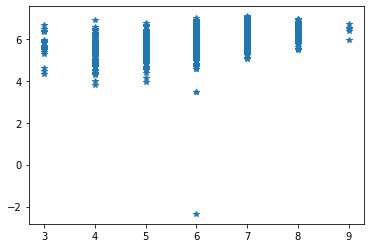

In [ ]:
y_pred=model.fittedvalues
plt.plot(y,y_pred,'*')

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df.drop('quality', axis = 1)

# dependent variable
y = df['quality']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
LR = LinearRegression()

In [ ]:
# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '5' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = LR, k_features = 5, forward = True, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-06-16 11:24:20] Features: 1/5 -- score: 0.17990986864079245[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-06-16 11:24:20] Features: 2/5 -- score: 0.22699738692230803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-06-16 11:24:20] Features: 3/5 -- score: 0.2503060623614603[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
# print the selected feature names when k_features = 5
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
 ('fixed acidity', 'volatile acidity', 'residual sugar', 'sulphates', 'alcohol')

R-squared:  0.2610230397540952


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
#Method-2 using RFE Package
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train, y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False False  True False  True  True]
[5 1 3 2 1 6 7 1 4 1 1]


In [ ]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# (2,6) means that all the possible subsets sequentially will be created 
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = (2,6), forward = True, verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward_range = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-06-16 11:31:34] Features: 1/6 -- score: 0.17990986864079245[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-06-16 11:31:34] Features: 2/6 -- score: 0.22699738692230803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-06-16 11:31:34] Features: 3/6 -- score: 0.2503060623614603[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
# print the selected feature names when k_features = (2, 6)
print('Features selelected using forward selection are: \n ',sfs_forward_range.k_feature_names_)

# print the R- squared value
print('\nR-squared: ', sfs_forward_range.k_score_)

Features selelected using forward selection are: 
  ('fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol')

R-squared:  0.26252269981266946


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-06-16 11:32:23] Features: 1/11 -- score: 0.17990986864079245[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-06-16 11:32:23] Features: 2/11 -- score: 0.22699738692230803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2021-06-16 11:32:24] Features: 3/11 -- score: 0.2503060623614603[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [ ]:
# print the selected feature names 
print('Features selelected using forward selection are:\n ', sfs_forward.k_feature_names_)

# print the R- squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are:
  ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol')

R-Squared:  0.2633744815333004


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# Build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 5)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol'], dtype='object')


In [ ]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[signi_feat_rfe]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
r2_value_rfe = linreg.score(new_X_train, y_train)

# print the r-scored value
print('The r-squared value for the model built using the variables obtained using RFE is: ', r2_value_rfe)

The r-squared value for the model built using the variables obtained using RFE is:  0.23927363945441182


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# storing the significant variables obtained after performing the forward selection
sfs_features = sfs_forward.k_feature_names_

# Creating a subset of X_train and X_test using sfs_features
new_X_train = X_train.loc[:,sfs_features]
new_X_test = X_test.loc[:,sfs_features]

# initiate the Linear Regression model
linreg = LinearRegression()

# fit the model 
linreg.fit(new_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# for training set:
# train_pred: Prediction made by the model on the training dataset 'X_train'
# y_train: Actual values of the target variable for the train dataset

# for testing set:
# test_pred: Prediction made by the model on the test dataset 'y_train'
# y_test: Actual values of the target variable for the test dataset

# predict the output of the target variable from the train data
# train_pred can also be obtained from "MLR_model_with_significant_var.fittedvalues"
train_pred = linreg.predict(new_X_train)

# predict the output of the target variable from the test data
test_pred = linreg.predict(new_X_test)

# calculate the mse using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the mse and then rounding the value upto 4 digits
rmse_train = round(np.sqrt(mse_train), 4)

# print the rmse for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)

# print the rmse for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.7592
Root Mean Squared Error (RMSE) on test set:  0.7531


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [ ]:
LR=LinearRegression()

In [ ]:
# create loocv procedure
cv = LeaveOneOut()
# evaluate model
mse = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
rmse=np.sqrt(np.abs(mse))
# report performance
print('RMSE: %.3f (%.3f)' % (np.mean(rmse), np.std(rmse,ddof=1)))

RMSE: 0.587 (0.480)


In [ ]:
# K-fold-cross validation
kf=KFold(n_splits=5,shuffle=True,random_state=1)
# evaluate model
mse = cross_val_score(LR, X_std, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
rmse=np.sqrt(np.abs(mse))
# report performance
print('RMSE: %.3f (%.3f)' % (np.mean(rmse), np.std(rmse,ddof=1)))

RMSE: 0.587 (0.480)
